In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [27]:
argentina_file_path = './Sample Data/raw stats/Argentina-Primera Division.xlsx'

argentina = pd.read_excel(argentina_file_path, index_col='ID')
argentina.info()


argentina.dropna(axis='columns', how='all', inplace=True)
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, AA001 to AA489
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Player                         489 non-null    object 
 1   Team                           486 non-null    object 
 2   Position                       489 non-null    object 
 3   Age                            489 non-null    int64  
 4   Market value                   489 non-null    int64  
 5   Contract expires               427 non-null    object 
 6   Matches played                 489 non-null    int64  
 7   Minutes played                 489 non-null    int64  
 8   Goals                          489 non-null    int64  
 9   xG                             489 non-null    float64
 10  Assists                        489 non-null    int64  
 11  xA                             489 non-null    float64
 12  Birth country                  489 non-null    ob

In [3]:
positions_df = argentina['Position'].str.split(',', expand=True)
positions_df.columns = ['Position' + str(col) for col in positions_df.columns]
positions_df

,Position0,Position1,Position2
ID,,,
AA001,RCB,None,None
AA002,RCMF,None,None
AA003,RB,None,None
AA004,LCB,None,None
AA005,LB,None,None
...,...,...,...
AA485,CF,None,None
AA486,RCMF3,None,None
AA487,LCMF,None,None


In [10]:
argentina.drop('Position', axis='columns')
arg_df = pd.concat([argentina, positions_df], axis=1)

In [5]:
percentage_cols = []
for col in arg_df.select_dtypes(include=np.number).columns.tolist():
    if '%' in col:
        percentage_cols.append(col)

In [6]:
num_non_scalable = arg_df[['Age',
                            'Market value',
                            'Matches played',
                            'Minutes played',
                            'Height',
                            'Weight']].columns.tolist()

In [7]:
arg_df.Foot.value_counts()

right      327
left       100
both         1
unknown      1
Name: Foot, dtype: int64

In [8]:
arg_df[['Foot']].dtypes

Foot    object
dtype: object

In [9]:
df_to_scale = arg_df[arg_df.select_dtypes(include=np.number).columns.difference(num_non_scalable + percentage_cols)]

df_to_scale

,Aerial duels per 90U,Assists,Assists per 90,"Avg lng pass length, m","Avg pass length, m",Back passes per 90,Clean sheets,Crosses from left per 90,Crosses from right per 90,Crosses per 90,...,Thru passes per 90,Touches in box per 90,Yellow cards,Yellow cards per 90,xA,xA per 90,xG,xG against,xG against per 90,xG per 90
ID,,,,,,,,,,,,,,,,,,,,,
AA001,4.86,0,0.00,39.73,22.52,1.52,0,0.00,0.00,0.00,...,0.30,0.30,1,0.30,0.00,0.00,0.10,0.0,0.0,0.03
AA002,1.22,0,0.00,27.03,16.00,6.39,0,0.00,0.30,0.30,...,0.00,1.82,1,0.30,0.28,0.09,0.72,0.0,0.0,0.22
AA003,2.13,0,0.00,39.84,19.74,6.39,0,0.00,2.74,2.74,...,0.91,0.61,1,0.30,0.12,0.04,0.00,0.0,0.0,0.00
AA004,3.65,0,0.00,35.86,22.68,3.34,0,0.00,0.00,0.00,...,0.00,0.61,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00
AA005,3.05,1,0.31,29.94,18.57,3.97,0,3.05,0.00,3.05,...,0.61,0.31,2,0.61,0.32,0.10,0.01,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AA485,NaN,0,NaN,0.00,2.50,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,0.00,NaN,0.00,0.0,NaN,NaN
AA486,NaN,0,NaN,0.00,0.00,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,0.00,NaN,0.00,0.0,NaN,NaN
AA487,NaN,0,NaN,0.00,23.37,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,0.00,NaN,0.00,0.0,NaN,NaN


In [23]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df_to_scale.index)
scaled_df = scaled_df * 100

scaled_df[scaled_df['Goals'] == scaled_df['Goals'].max()]

,Aerial duels per 90U,Assists,Assists per 90,"Avg lng pass length, m","Avg pass length, m",Back passes per 90,Clean sheets,Crosses from left per 90,Crosses from right per 90,Crosses per 90,...,Thru passes per 90,Touches in box per 90,Yellow cards,Yellow cards per 90,xA,xA per 90,xG,xG against,xG against per 90,xG per 90
ID,,,,,,,,,,,,,,,,,,,,,
AA015,7.298411,0.0,0.0,0.0,24.002371,20.985979,0.0,0.0,0.0,0.0,...,22.302158,28.838174,33.333333,16.230366,52.066116,17.241379,70.833333,0.0,0.0,26.923077


In [24]:
arg_df[arg_df['Goals'] == arg_df['Goals'].max()].Goals

ID
AA015    3
Name: Goals, dtype: int64

In [17]:
''' #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Player                         489 non-null    object 
 1   Team                           486 non-null    object 
 2   Position                       489 non-null    object 
 3   Age                            489 non-null    int64  
 4   Market value                   489 non-null    int64  
 5   Contract expires               427 non-null    object 
 6   Matches played                 489 non-null    int64  
 7   Minutes played                 489 non-null    int64  
 8   Goals                          489 non-null    int64  
 9   xG                             489 non-null    float64
 10  Assists                        489 non-null    int64  
 11  xA                             489 non-null    float64
 12  Birth country                  489 non-null    object 
 13  Passport country               489 non-null    object 
 14  Foot                           429 non-null    object 
 15  Height                         489 non-null    int64  
 16  Weight                         489 non-null    int64  
 17  On loan                        489 non-null    object 
 18  Succ. def. per 90              407 non-null    float64
 19  Def duels per 90               407 non-null    float64
 20  Def duels won %                407 non-null    float64
 21  Aerial duels per 90U           407 non-null    float64
 22  Aerial duels won %V            407 non-null    float64
 23  Tackles per 90                 407 non-null    float64
 24  Shots blocked per 90           407 non-null    float64
 25  Interceptions per 90           407 non-null    float64
 26  Fouls per 90                   407 non-null    float64
 27  Yellow cards                   489 non-null    int64  
 28  Yellow cards per 90            407 non-null    float64
 29  Red cards                      489 non-null    int64  
 30  Red cards per 90               407 non-null    float64
 31  Succ. att. actions             407 non-null    float64
 32  Goals per 90AI                 407 non-null    float64
 33  Non-penalty goals              489 non-null    int64  
 34  Non-penalty goals per 90       407 non-null    float64
 35  xG per 90                      407 non-null    float64
 36  Head goals total               489 non-null    int64  
 37  Head goals per 90              407 non-null    float64
 38  Shots total                    489 non-null    int64  
 39  Shots per 90AP                 407 non-null    float64
 40  Shots on target %              407 non-null    float64
 41  Goal conv., %                  489 non-null    float64
 42  Assists per 90                 407 non-null    float64
 43  Crosses per 90                 407 non-null    float64
 44  Crosses, %                     407 non-null    float64
 45  Crosses from left per 90       407 non-null    float64
 46  Crosses from left, %           407 non-null    float64
 47  Crosses from right per 90      407 non-null    float64
 48  Crosses from right, %          407 non-null    float64
 49  Crosses to goalie box per 90   407 non-null    float64
 50  Dribbles per 90                407 non-null    float64
 51  Dribbles succ. %               407 non-null    float64
 52  Touches in box per 90          407 non-null    float64
 53  Passes per 90                  407 non-null    float64
 54  Passes acc. %                  407 non-null    float64
 55  Fwd passes per 90              407 non-null    float64
 56  Fwd passes acc. %              407 non-null    float64
 57  Back passes per 90             407 non-null    float64
 58  Back passes acc. %             407 non-null    float64
 59  Lat passes per 90              407 non-null    float64
 60  Lat passes acc. %              407 non-null    float64
 61  Sh/m passes per 90             407 non-null    float64
 62  Sh/m passes acc. %             407 non-null    float64
 63  Lng passes per 90              407 non-null    float64
 64  Lng passes acc. %              407 non-null    float64
 65  Avg pass length, m             489 non-null    float64
 66  Avg lng pass length, m         489 non-null    float64
 67  xA per 90                      407 non-null    float64
 68  Second assists per 90          407 non-null    float64
 69  Third assists per 90           407 non-null    float64
 70  Smt passes per 90              407 non-null    float64
 71  Smt passes acc. %              407 non-null    float64
 72  Key passes per 90              407 non-null    float64
 73  Final 3rd passes per 90        407 non-null    float64
 74  Final 3rd passes acc. %        407 non-null    float64
 75  Passes to penalty area per 90  407 non-null    float64
 76  Passes to penalty area acc. %  407 non-null    float64
 77  Thru passes per 90             407 non-null    float64
 78  Thru passes acc. %             407 non-null    float64
 79  Deep completed passes per 90   407 non-null    float64
 80  Deep completed crosses per 90  407 non-null    float64
 81  Goals total                    489 non-null    int64  
 82  Goals per 90CI                 31 non-null     float64
 83  Shots total.1                  489 non-null    int64  
 84  Shots per 90CK                 31 non-null     float64
 85  Clean sheets                   489 non-null    int64  
 86  Save %                         489 non-null    float64
 87  xG against                     489 non-null    float64
 88  xG against per 90              407 non-null    float64
 89  Exits per 90                   31 non-null     float64
 90  Competition                    489 non-null    object '''

' #   Column                         Non-Null Count  Dtype  \n---  ------                         --------------  -----  \n 0   Player                         489 non-null    object \n 1   Team                           486 non-null    object \n 2   Position                       489 non-null    object \n 3   Age                            489 non-null    int64  \n 4   Market value                   489 non-null    int64  \n 5   Contract expires               427 non-null    object \n 6   Matches played                 489 non-null    int64  \n 7   Minutes played                 489 non-null    int64  \n 8   Goals                          489 non-null    int64  \n 9   xG                             489 non-null    float64\n 10  Assists                        489 non-null    int64  \n 11  xA                             489 non-null    float64\n 12  Birth country                  489 non-null    object \n 13  Passport country               489 non-null    object \n 14  Foot              

<AxesSubplot:xlabel='Shots total', ylabel='xG'>

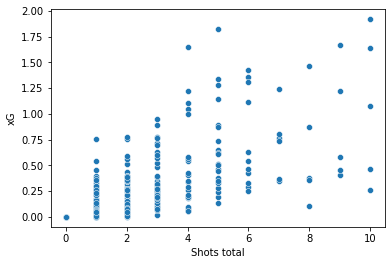

In [20]:
sns.scatterplot(data=arg_df, x='Shots total', y='xG')